In [16]:
# d2 利用matplotlib 分析链家租房数据并制作可视化图表

import pandas as pd
from matplotlib import pyplot as plt
# 显示图表中的中文字符 mac可设为Hiragino Sans GB,windows可设为SimHei
plt.rcParams['font.sans-serif'] =['Hiragino Sans GB']
plt.rcParams['axes.unicode_minus'] = False

In [17]:
# task1--读取 CSV 格式文件“task_2_lianjia_data.csv”;
# 将数据命名为 lianjia_data;
# 并选取前部数据查看;
lianjia_data = pd.read_csv('/Users/apple/Desktop/task_2_lianjia_data.csv')
print(lianjia_data)

               简介（方式·小区名 户型 朝向）   区  地铁站               村  面积大小（㎡）   朝向  \
0                整租·长桥一村 1室0厅 南  徐汇   长桥            长桥一村       39    南   
1                整租·馨宁公寓 1室1厅 南  徐汇   华泾            馨宁公寓       42    南   
2                整租·长桥三村 2室1厅 南  徐汇   长桥            长桥三村       51    南   
3                整租·东湾小区 1室1厅 南  徐汇   华泾            东湾小区       47    南   
4              整租·花苑村紫竹园 1室1厅 南  徐汇   康健          花苑村紫竹园       42    南   
..                          ...  ..  ...             ...      ...  ...   
747  整租·布鲁斯小镇(绿地·皇家官邸) 3室2厅 南/北  浦东   惠南  布鲁斯小镇(绿地·皇家官邸)      171  南 北   
748            整租·开鲁四村 1室1厅 南/北  杨浦   中原            开鲁四村       41  南 北   
749           整租·民乐城康苑 3室2厅 南/北  浦东   惠南           民乐城康苑      125  南 北   
750              整租·五岭小区 1室0厅 南  黄浦  打浦桥            五岭小区       36    南   
751           整租·武川路245弄 1室1厅 南  杨浦  五角场         武川路245弄       34    南   

         户型                         楼层类型  楼层（层）           标签  
0    1室0厅1卫  高楼层                              6 

In [18]:
print(lianjia_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752 entries, 0 to 751
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   简介（方式·小区名 户型 朝向）  752 non-null    object
 1   区                 752 non-null    object
 2   地铁站               752 non-null    object
 3   村                 752 non-null    object
 4   面积大小（㎡）           752 non-null    int64 
 5   朝向                752 non-null    object
 6   户型                752 non-null    object
 7   楼层类型              752 non-null    object
 8   楼层（层）             752 non-null    int64 
 9   标签                752 non-null    object
dtypes: int64(2), object(8)
memory usage: 58.9+ KB
None


In [19]:
print(lianjia_data.describe())

          面积大小（㎡）       楼层（层）
count  752.000000  752.000000
mean    51.535904    8.275266
std     27.065710    6.175207
min      7.000000    1.000000
25%     34.000000    6.000000
50%     43.000000    6.000000
75%     61.250000    7.000000
max    172.000000   35.000000


In [20]:
print(lianjia_data.head())

   简介（方式·小区名 户型 朝向）   区 地铁站       村  面积大小（㎡） 朝向      户型  \
0    整租·长桥一村 1室0厅 南  徐汇  长桥    长桥一村       39  南  1室0厅1卫   
1    整租·馨宁公寓 1室1厅 南  徐汇  华泾    馨宁公寓       42  南  1室1厅1卫   
2    整租·长桥三村 2室1厅 南  徐汇  长桥    长桥三村       51  南  2室1厅1卫   
3    整租·东湾小区 1室1厅 南  徐汇  华泾    东湾小区       47  南  1室1厅1卫   
4  整租·花苑村紫竹园 1室1厅 南  徐汇  康健  花苑村紫竹园       42  南  1室1厅1卫   

                          楼层类型  楼层（层）       标签  
0  高楼层                              6     随时看房  
1  高楼层                             29  精装,随时看房  
2  高楼层                              6     随时看房  
3  中楼层                              6     随时看房  
4  高楼层                              6     随时看房  


In [21]:
# task2--利用 groupby 函数，以【面积大小（㎡）】字段进行 groupby;
# 统计各个面积下的【房源数量】情况;
a = lianjia_data.groupby('面积大小（㎡）')['区'].agg([('房源数量','count')])
print(a)
print('-'*30)
print(type(a))

         房源数量
面积大小（㎡）      
7           1
9           3
10          1
11          1
12          1
...       ...
152         1
155         1
162         1
171         1
172         1

[123 rows x 1 columns]
------------------------------
<class 'pandas.core.frame.DataFrame'>


In [22]:
# task3--将第2问所统计数据，作折线图和条形图;
# 并得出相关结论，
# 提示:先提取第2问 所得数据表的 index 索引，并转化成 list;
# 再提取【房源数量】的值转成 list;
# 提取lianjia_squre的索引，即不同的面积大小，并转换成list，用作横坐标值
a_x = list(a.index)
print(a_x)

[7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 103, 104, 105, 106, 108, 109, 110, 111, 113, 116, 118, 121, 123, 125, 126, 128, 129, 130, 131, 133, 137, 139, 143, 145, 151, 152, 155, 162, 171, 172]


In [23]:
# 提取lianjia_squre【房源数量】的数据值，用作纵坐标值
a_y = list(a['房源数量'].values)
print(a_y)

[1, 3, 1, 1, 1, 1, 2, 5, 4, 1, 4, 1, 7, 2, 4, 4, 4, 6, 3, 7, 12, 16, 37, 11, 19, 21, 29, 38, 24, 18, 24, 11, 9, 22, 20, 15, 8, 16, 15, 10, 17, 9, 14, 10, 17, 8, 9, 10, 6, 3, 4, 3, 8, 9, 6, 5, 6, 3, 7, 2, 5, 4, 5, 4, 2, 3, 3, 2, 4, 2, 3, 3, 6, 3, 2, 1, 2, 1, 2, 2, 6, 4, 7, 3, 5, 2, 3, 9, 4, 2, 4, 3, 2, 2, 1, 4, 4, 2, 3, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


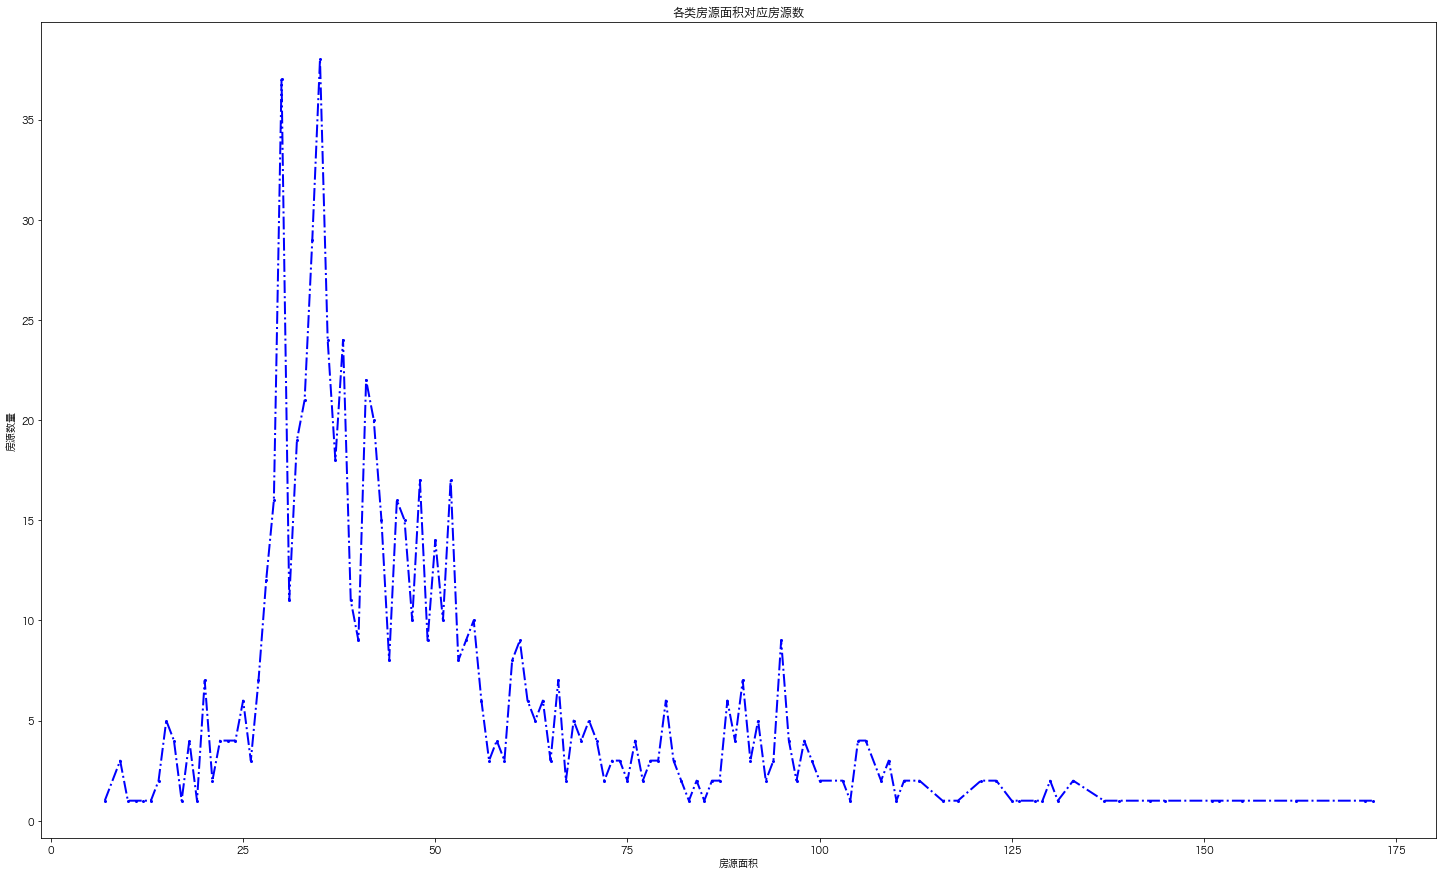

In [24]:
# 调用plt，作趋势图（即折线图）
# plt.plot（横坐标数值，纵坐标数值，线的类型，颜色，线宽，标记点类型，标记大小,与下方一一对应
plt.plot(a_x,a_y,'-.',color = 'b',linewidth = 2,marker='o',markersize = 2)
# 设置图片标题
plt.title('各类房源面积对应房源数')
# 设置图片横轴标签
plt.xlabel('房源面积')
# 设置图片纵轴标签
plt.ylabel('房源数量')
# 设置图片大小
plt.rcParams['figure.figsize'] = (25,15)
# 保存图片为
plt.savefig('house_area_plot.jpeg')
# 展示图片
plt.show()

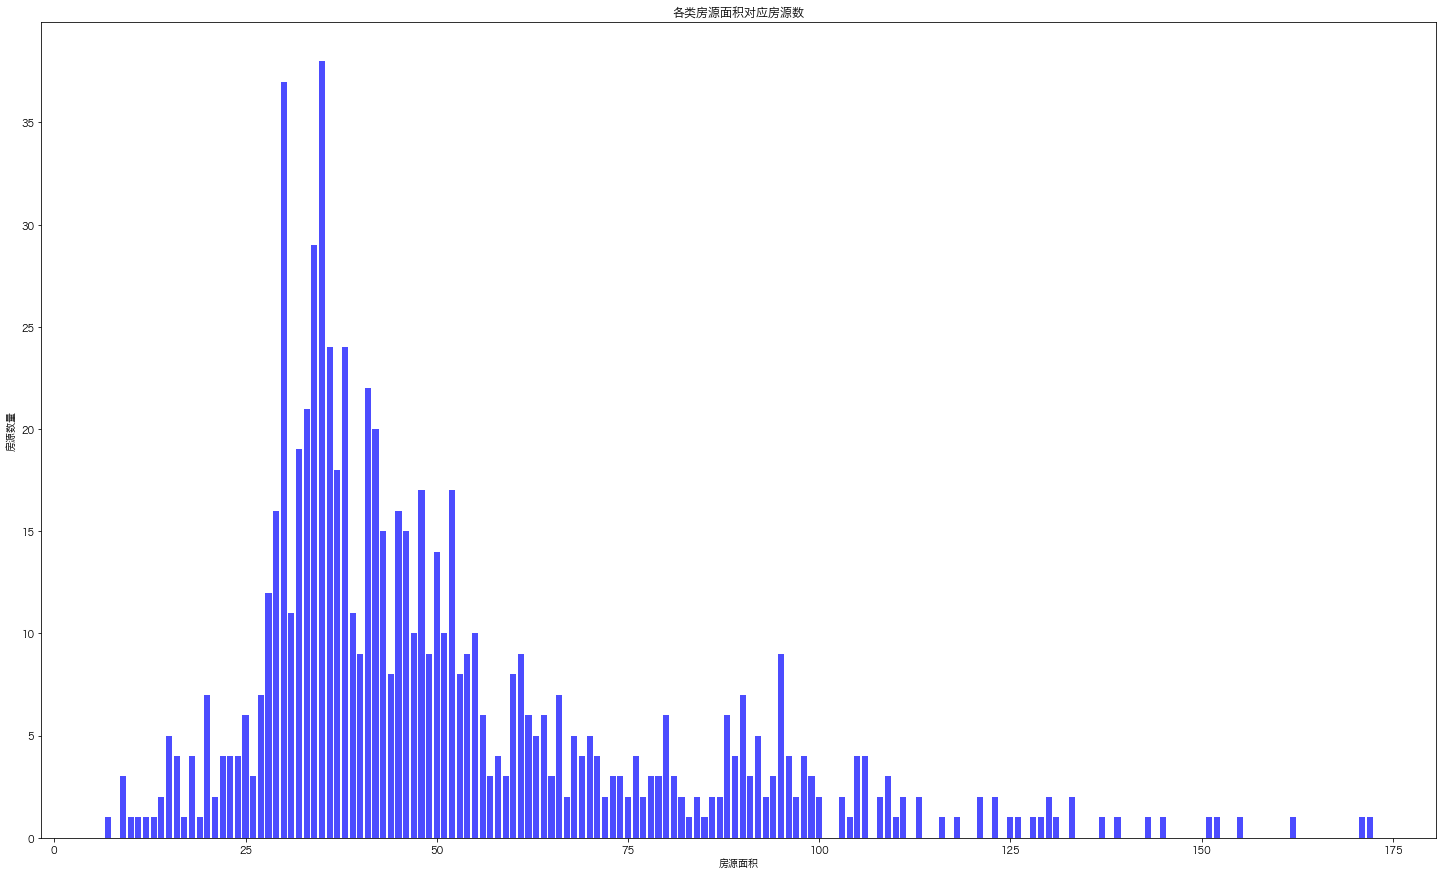

In [25]:
# 调用plt，作条形图--直方图形式
# plt.bar（横坐标数值，纵坐标数值，条形分布类型，颜色，条形透明度）
# plt.bar(lianjia_squre_index,lianjia_count,align="center",color="r",alpha=0.7)
plt.bar(a_x,a_y,align='center',color = 'b',alpha = 0.7)
# 设置图片标题
plt.title('各类房源面积对应房源数')
# 设置图片横轴标签
plt.xlabel('房源面积')
# 设置图片纵轴标签
plt.ylabel('房源数量')
# 设置图片大小
plt.rcParams['figure.figsize'] = (25,15)
# 保存图片为
plt.savefig('house_area_bar.jpeg')
# 展示图片
plt.show()

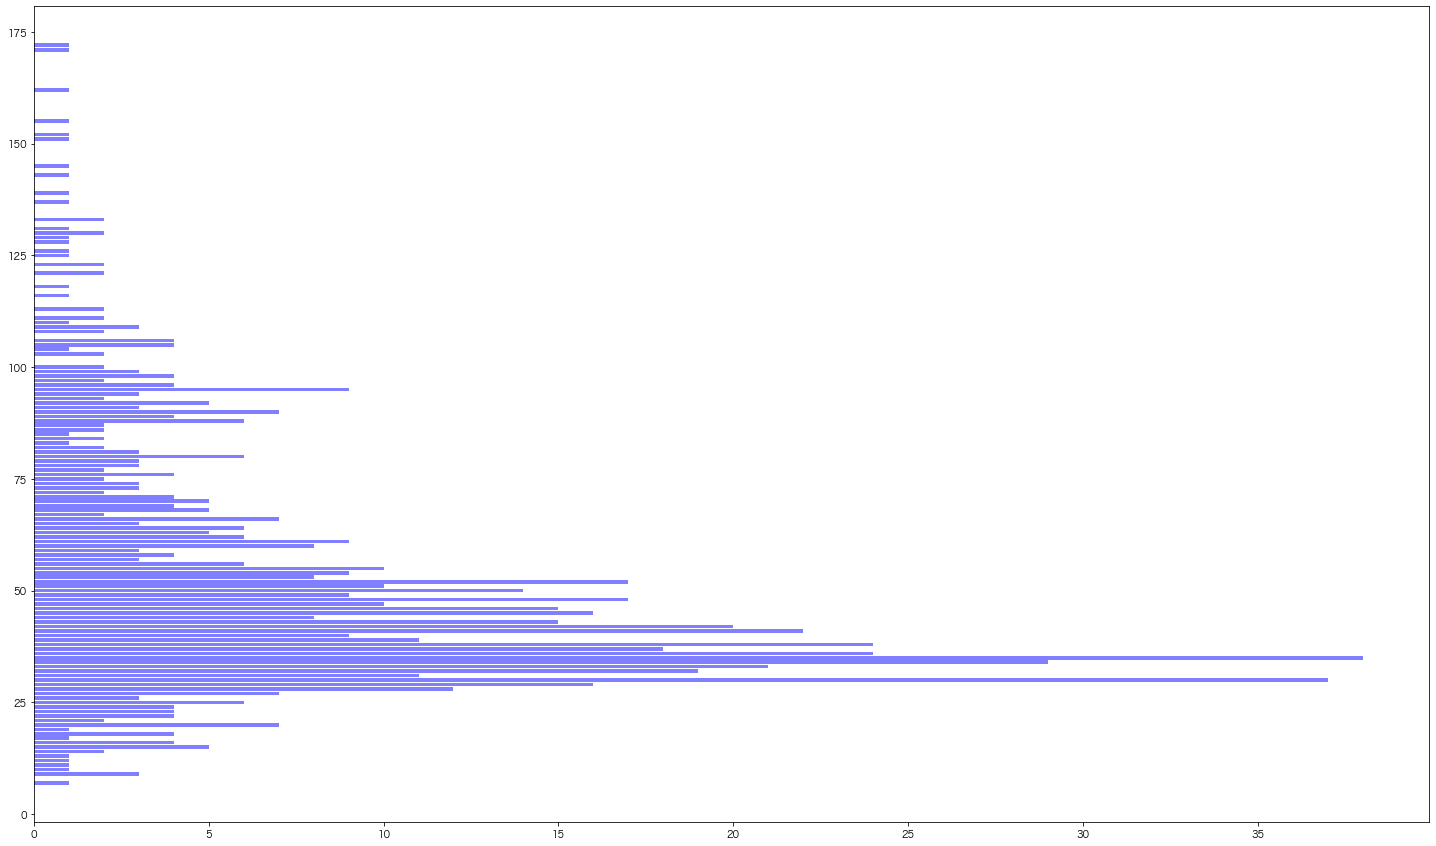

In [26]:
# 横向条形图
plt.barh(a_x,a_y,align="center",color='b',alpha=0.5)
# 保存图片
plt.savefig('house_area_barh.jpeg')
# 展示图片
plt.show()

In [27]:
# task4--利用 groupby 函数，
# 以【区】字段进行 groupby，
# 统计各个上海各个“区”所属的【房源数量】情况;
b = lianjia_data.groupby('区')['户型'].agg([('房源数量','count')])
print(b)

    房源数量
区       
嘉定     6
奉贤     1
徐汇   126
普陀    22
杨浦    56
松江    45
浦东   106
虹口    24
长宁    86
闵行    86
青浦    10
静安   108
黄浦    76


In [28]:
# task5--将第4问所统计数据，作条形图，并得出相关结论;
b.sort_values(by='房源数量',ascending=False,inplace=True)
print(b)

    房源数量
区       
徐汇   126
静安   108
浦东   106
长宁    86
闵行    86
黄浦    76
杨浦    56
松江    45
虹口    24
普陀    22
青浦    10
嘉定     6
奉贤     1


In [29]:
# 提取相应索引，用作横坐标值
b_x = list(b.index)
print(b_x)

['徐汇', '静安', '浦东', '长宁', '闵行', '黄浦', '杨浦', '松江', '虹口', '普陀', '青浦', '嘉定', '奉贤']


In [30]:
# 提取【房源数量】值,用作纵坐标值
b_y = list(b['房源数量'].values)
print(b_y)

[126, 108, 106, 86, 86, 76, 56, 45, 24, 22, 10, 6, 1]


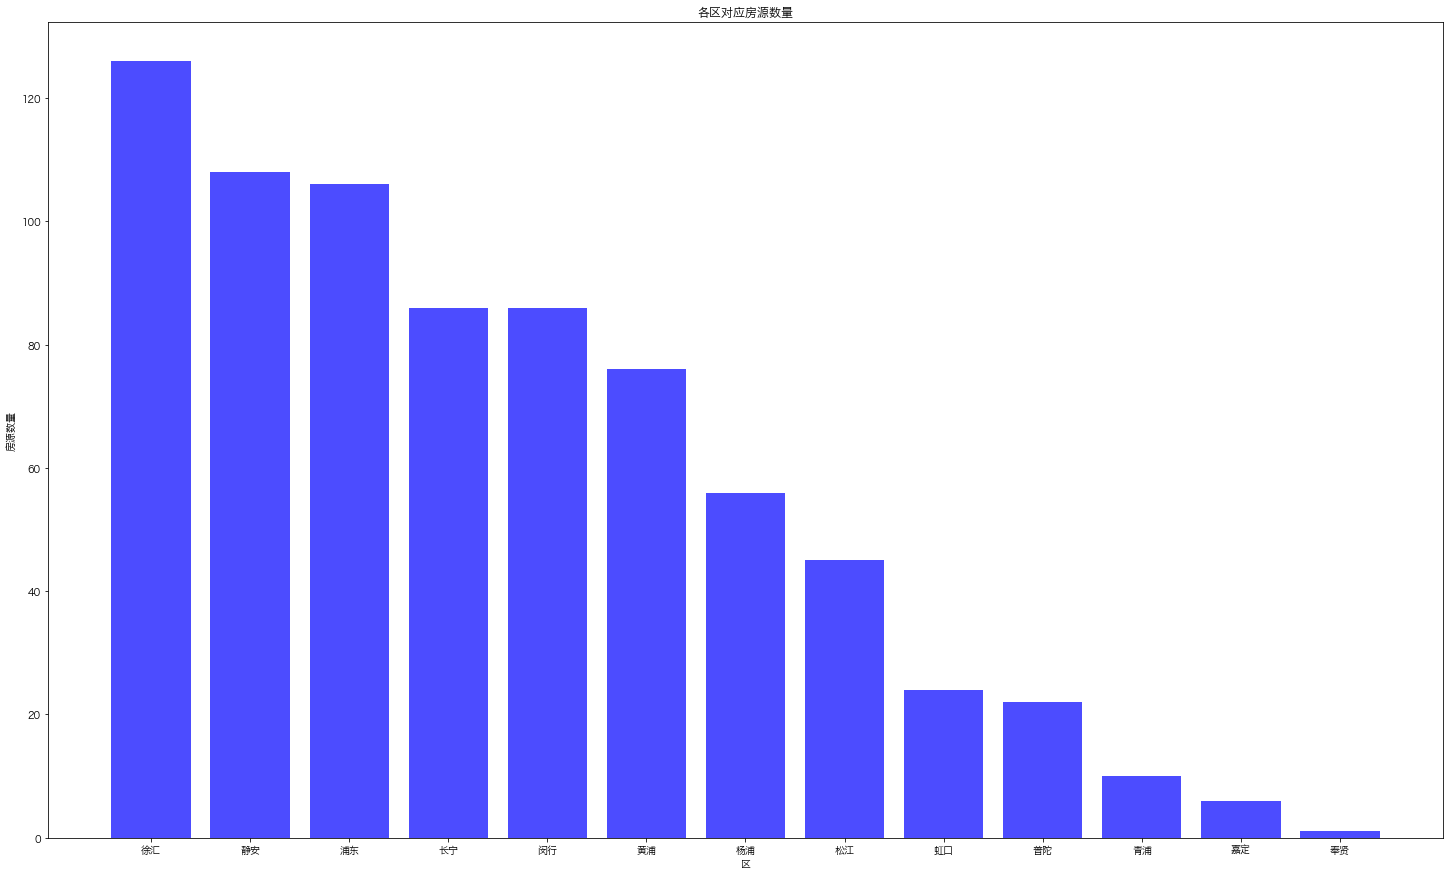

In [31]:
# 调用plt，作条形图
# plt.bar（横坐标数值，纵坐标数值，条形分布类型，颜色，条形透明度）
plt.bar(b_x,b_y,align='center',color = 'b',alpha = 0.7)
# 设置图片标题
plt.title('各区对应房源数量')
# 设置图片横轴标签
plt.xlabel('区')
# 设置图片纵轴标签
plt.ylabel('房源数量')
# 设置图片大小
plt.rcParams['figure.figsize'] = (25,15)
# 保存图片为
plt.savefig('district_bar.jpeg')
# 展示图片
plt.show()

In [32]:
# task6--利用 groupby 函数，
# 以【楼层类型】字段进行 groupby，
# 统计各个楼层所属的【房源数量】情况;
c = lianjia_data.groupby('楼层类型')['区'].agg([('房源数量','count')]).sort_values(by='房源数量',ascending=False)
print(c)

                             房源数量
楼层类型                             
高楼层                           370
中楼层                           231
低楼层                           146
地下室                             5


In [33]:
# task7--将第6问所统计数据，作饼图，并得出相关结论。
# 提取相应索引，做横坐标值
c_x = list(c.index)
print(c_x)

['高楼层                        ', '中楼层                        ', '低楼层                        ', '地下室                        ']


In [34]:
# 提取相应索引，做纵坐标值
c_y = list(c['房源数量'].values)
print(c_y)

[370, 231, 146, 5]


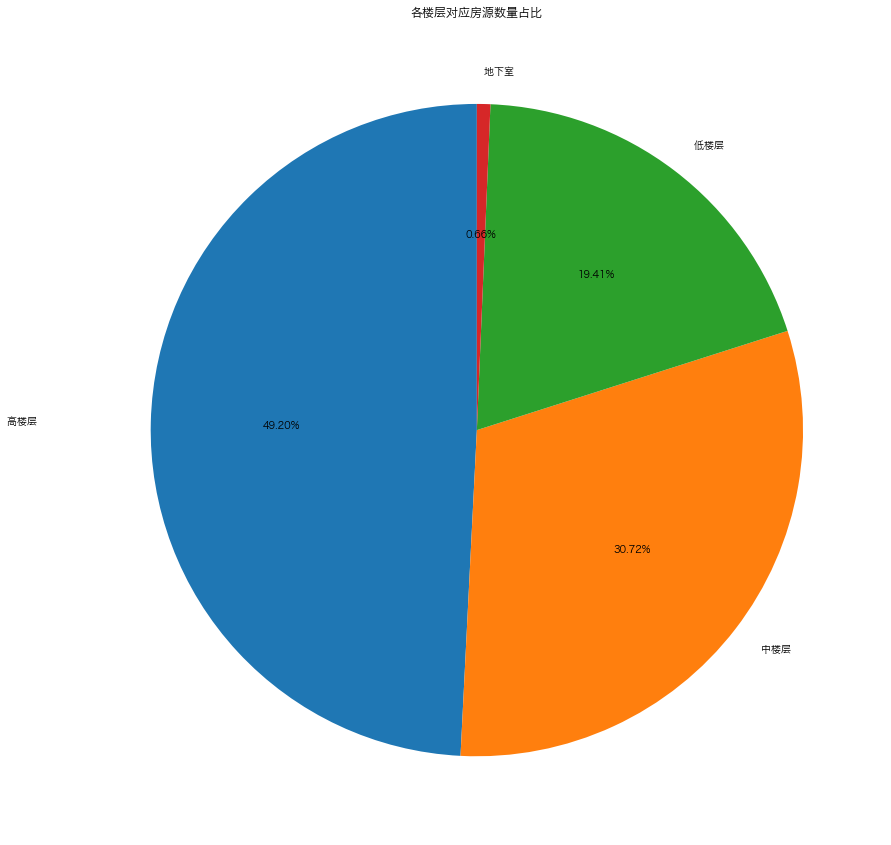

In [35]:
# 调用plt，作饼图
# plt.pie（数值，数值的标签，百分比，开始位置）
plt.pie(c_y,labels=c_x,autopct='%.2f%%',startangle=90)
# 设置图片标题
plt.title('各楼层对应房源数量占比')
# 设置图片大小
plt.rcParams['figure.figsize'] = (25,15)
# 保存图片为
plt.savefig('floor_pie.jpeg')
# 展示图片
plt.show()